This project is about clustering the Toronto area to find the most "comfortable" living area. 
For this case" comfort" is defined as low apartment rental price and adequate supporting facilities, such as: restaurant, coffee shop, park, gym, grocery store, farmers market, bakery and cafe.
The facility and venue data is taken from foursquare while the apartment rental data is taken from Kaggle (https://www.kaggle.com/rajacsp/toronto-apartment-price).

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import preprocessing
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from unicodedata import normalize
import seaborn as sns

Libraries imported.


In [2]:
tab = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
tabdf=tab[0]
coord=pd.read_csv('Geospatial_Coordinates.csv')
df=pd.merge(tabdf,coord,on='Postal Code',how='inner')
df.shape

(103, 5)

In [3]:
address = 'Toronto'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [4]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [5]:
toronto_data = df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_data


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [6]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [7]:
CLIENT_ID = 'A3OUPVRLHSPISMR4J04G4VIRLN2AQOY3MRX4IVQTHCMG3AHK' # your Foursquare ID
CLIENT_SECRET = 'MAEPPWFABHM3URCERMEFDEP3ABMJ3KFRU214W1FQMMGESHKK' # your Foursquare Secret
VERSION = '20201026' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A3OUPVRLHSPISMR4J04G4VIRLN2AQOY3MRX4IVQTHCMG3AHK
CLIENT_SECRET:MAEPPWFABHM3URCERMEFDEP3ABMJ3KFRU214W1FQMMGESHKK


In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
#search rasiud is extended to 5 km    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )


Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [10]:
toronto_venues.groupby('Neighborhood').count()
#the result shows 100 venues for each neighborhood (maximum value allowed by foursquare) 

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,100,100,100,100,100,100
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",100,100,100,100,100,100
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",100,100,100,100,100,100
Central Bay Street,100,100,100,100,100,100
Christie,100,100,100,100,100,100
Church and Wellesley,100,100,100,100,100,100
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,100,100,100,100,100,100


In [11]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
3,"Regent Park, Harbourfront",43.65426,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market
4,"Regent Park, Harbourfront",43.65426,-79.360636,Souk Tabule,43.653756,-79.354390,Mediterranean Restaurant


In [12]:
toronto_venues.to_csv('toronto_venues.csv')

In [13]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 165 uniques categories.


In [14]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
col_name='Neighborhood'
first_col=toronto_onehot.pop(col_name)
toronto_onehot.insert(0, col_name, first_col)
toronto_onehot.head()
toronto_onehot.to_csv('toronto_onehot.csv')

In [15]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.to_csv('toronto_grouped.csv')

In [16]:
toronto_grouped.head

<bound method NDFrame.head of                                          Neighborhood  Afghan Restaurant  \
0                                         Berczy Park               0.00   
1        Brockton, Parkdale Village, Exhibition Place               0.00   
2   Business reply mail Processing Centre, South C...               0.00   
3   CN Tower, King and Spadina, Railway Lands, Har...               0.00   
4                                  Central Bay Street               0.00   
5                                            Christie               0.00   
6                                Church and Wellesley               0.00   
7                      Commerce Court, Victoria Hotel               0.00   
8                                          Davisville               0.00   
9                                    Davisville North               0.01   
10                       Dufferin, Dovercourt Village               0.00   
11             First Canadian Place, Underground city     

In [17]:
rent=pd.read_csv('Toronto_apartment_rentals_2018.csv')
#take the toronto apartment rental data taken from Kaggle

In [18]:
#insert the neigborhood area to then rent data frame
rent2=pd.merge(toronto_data,rent,on='Postal Code')
rent2.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Bedroom,Bathroom,Den,Lat,Long,Price,Address
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,2,2.0,0,43.655192,-79.353912,4000,"170 Bayview Avenue, Toronto M5A 0M4 O"
1,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,1,1.0,0,43.644776,-79.366574,4000,"Queens Quay E, Toronto, O"
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,2,2.0,0,43.652757,-79.366511,3500,"460 Adelaide St E, Toronto, O"
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,1,1.0,1,43.655988,-79.358877,3200,"52 Sumach St, Toronto, O"
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,1,1.0,1,43.655988,-79.358877,3200,"52 Sumach St, Toronto, O"


In [19]:
#calculate the mean for apartment rental price in each neighborhood
rent=rent2.drop(['Borough','Bedroom','Bathroom','Den','Lat','Long','Address','Postal Code'],axis=1)
rent.rename(columns={'Neighbourhood': 'Neighborhood'},inplace=True)
rent=rent.groupby('Neighborhood').mean()
rent.to_csv('Export.csv')
rent.head(10)

,Latitude,Longitude,Price
Neighborhood,,,
Berczy Park,43.644771,-79.373306,2680.000000
"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,2057.425532
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",43.628947,-79.394420,2474.300493
Central Bay Street,43.657952,-79.387383,1855.555556
Christie,43.669542,-79.422564,2841.666667
Church and Wellesley,43.665860,-79.383160,2346.785714
Davisville,43.704324,-79.388790,2800.000000
"Dufferin, Dovercourt Village",43.669005,-79.442259,1695.176471
"Garden District, Ryerson",43.657162,-79.378937,2303.241935


In [20]:
#merge the average apartment rental price data with venue data in each neighborhood
data=pd.merge(rent,toronto_grouped,on="Neighborhood")
data.head()
data.to_csv('Data.csv')

In [22]:
#scale the rental price data and put the data along with venue data in basedata
rentprice=data[['Price']].values
min_max_scaler = preprocessing.MinMaxScaler()
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
rentpricescaled = min_max_scaler.fit_transform(rentprice)
rentdf = pd.DataFrame(data=rentpricescaled, columns=['Scaled Price'])
basedata=pd.concat([data, rentdf], axis=1, sort=False)
basedata=basedata.drop(['Price'],axis=1)
basedata.to_csv('Base Data.csv')
basedata.shape

(27, 168)

In [23]:
#many venues are basically restuarant with different types
#let's gruop all the restaurants together
#restaurant, scaled price and other venue data are stored in finaldata
colname=basedata.columns.str.contains('Restaurant')
colname=np.matrix(colname)
colint=colname.astype(int)
col=np.zeros((27,168))
col=np.zeros((27,168))
i=0
while i<27:
    col[i,:]=colname
    i=i+1
restbindata=pd.DataFrame(col)
restbindata.columns=basedata.columns
restdata=basedata.iloc[:,3:168]*restbindata.iloc[:,3:168]
restdata["Restaurant"] = restdata.sum(axis=1)
df = df[df.columns.drop(list(df.filter(regex='Test')))]
finaldata=basedata[basedata.columns.drop(list(basedata.filter(regex='Restaurant')))]
finaldata=pd.concat([finaldata, restdata["Restaurant"]], axis=1, sort=False)
finaldata.to_csv('finaldata.csv')

In [24]:
# set number of clusters
kclusters = 5
data_clustering = finaldata.drop(['Neighborhood','Latitude','Longitude'],axis= 1)


# run k-means clustering
kmeanswprep = KMeans(n_clusters=kclusters, random_state=0).fit(data_clustering)

# check cluster labels generated for each row in the dataframe
kmeanswprep.labels_[0:100] 

array([3, 4, 0, 2, 3, 0, 3, 2, 0, 0, 1, 4, 4, 1, 2, 0, 3, 2, 1, 4, 2, 0,
       2, 4, 1, 4, 2])

In [25]:
finaldata.insert(0,'Cluster Labels',kmeanswprep.labels_)
finaldata=pd.concat([finaldata, data["Price"]], axis=1, sort=False)
finaldata.to_csv('Outputwpre.csv')

In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(finaldata['Latitude'], finaldata['Longitude'], finaldata['Neighborhood'], finaldata['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:
#assess the cluster based on price and basic facility needed for comfortable living
#facilities: "Restaurant","Coffee Shop","Park","Gym","Grocery Store","Farmers Market","Café","Bakery"
summary=finaldata[["Cluster Labels","Neighborhood","Price","Restaurant","Coffee Shop","Park","Gym","Grocery Store","Farmers Market","Café","Bakery"]]

In [43]:
summary

,Cluster Labels,Neighborhood,Price,Restaurant,Coffee Shop,Park,Gym,Grocery Store,Farmers Market,Café,Bakery
0,3,Berczy Park,2680.000000,0.19,0.11,0.07,0.03,0.00,0.03,0.01,0.02
1,4,"Brockton, Parkdale Village, Exhibition Place",2057.425532,0.23,0.04,0.11,0.02,0.01,0.00,0.05,0.04
2,0,"CN Tower, King and Spadina, Railway Lands, Har...",2474.300493,0.22,0.04,0.08,0.04,0.00,0.02,0.04,0.04
3,2,Central Bay Street,1855.555556,0.26,0.07,0.03,0.03,0.00,0.02,0.05,0.01
4,3,Christie,2841.666667,0.22,0.06,0.07,0.00,0.01,0.00,0.07,0.04
5,0,Church and Wellesley,2346.785714,0.21,0.09,0.05,0.02,0.01,0.04,0.06,0.01
6,3,Davisville,2800.000000,0.17,0.06,0.10,0.02,0.03,0.01,0.06,0.04
7,2,"Dufferin, Dovercourt Village",1695.176471,0.28,0.06,0.06,0.00,0.02,0.00,0.14,0.03
8,0,"Garden District, Ryerson",2303.241935,0.21,0.10,0.06,0.02,0.00,0.03,0.03,0.01
9,0,"Harbourfront East, Union Station, Toronto Islands",2479.829545,0.21,0.09,0.07,0.04,0.00,0.03,0.03,0.04


In [66]:
table=summary.groupby("Cluster Labels").mean()
table

,Price,Restaurant,Coffee Shop,Park,Gym,Grocery Store,Farmers Market,Café,Bakery
Cluster Labels,,,,,,,,,
0,2380.739773,0.203333,0.093333,0.068333,0.023333,0.003333,0.031667,0.045000,0.025000
1,1228.125000,0.190000,0.082500,0.090000,0.017500,0.012500,0.010000,0.060000,0.037500
2,1865.683147,0.221429,0.077143,0.072857,0.008571,0.015714,0.014286,0.078571,0.027143
3,2775.957207,0.202500,0.077500,0.072500,0.020000,0.010000,0.017500,0.045000,0.030000
4,2078.116028,0.218333,0.065000,0.080000,0.015000,0.008333,0.010000,0.051667,0.028333


In [51]:
heatmapchart=table.drop("Price",axis=1)

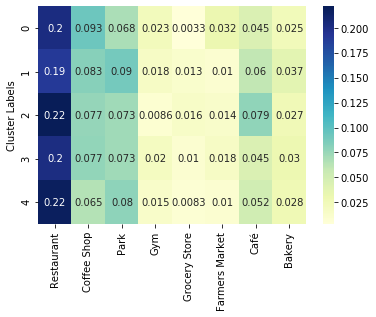

In [81]:
#shows the venue proportion in each cluster.
#bigger proportion equals more venue locations  
sns.heatmap(heatmapchart,cmap="YlGnBu",annot=True)

In [78]:
#shows the average apartment rental price in each cluster
barchart=table["Price"]
barchart

Cluster Labels
0    2380.739773
1    1228.125000
2    1865.683147
3    2775.957207
4    2078.116028
Name: Price, dtype: float64

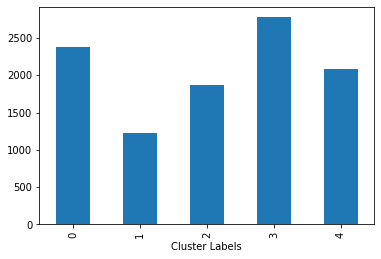

In [80]:
barchart.plot.bar()